<h1><center> DS 200 - Lec10: Visualization with Seanborn </center></h1>

In this lecture, we will cover the topic of data visualization with Seaborn! We will discuss the following sections:

+ Section 1: Distribution plots
    + Univariate
    + Bivariate
+ Section 2: Categorical plots
+ Section 3: Matrix plots
+ Section 4: Grids

## Section 1. Distribution Plots for Numeric Variables

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

+ Univariate
    * histplot
    * rugplot
    * kdeplot
+ Bivariate
    * jointplot
    * pairplot


___
#### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Data
Seaborn comes with built-in datasets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1) Univariate Distribution Plots:

#### histplot

`sns.histplot()` in Seaborn is similar to histograms. The histplot shows the distribution of a univariate set of observations.

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

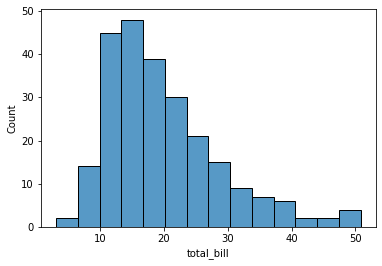

In [4]:
#sns.histplot(tips, x= 'total_bill')
sns.histplot(tips['total_bill'])


To remove the kde layer and just have the histogram use:

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

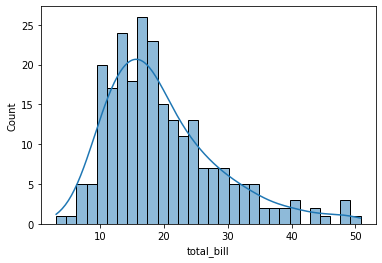

In [43]:
sns.histplot(tips['total_bill'], bins = 30, kde = True)



#### rugplot

`sns.rugplot()` is actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

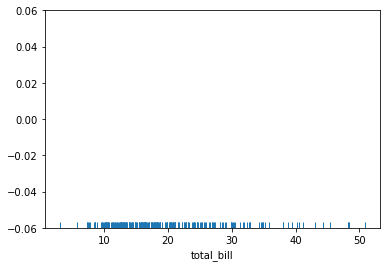

In [44]:
sns.rugplot(data = tips, x = 'total_bill')



#### kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

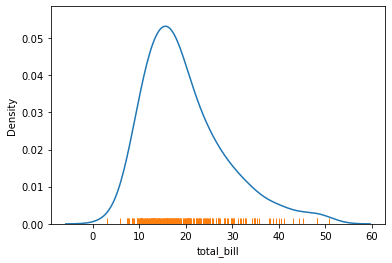

In [45]:

sns.kdeplot(data = tips, x = 'total_bill')
sns.rugplot(data = tips, x = 'total_bill')

### 2) Bivariate Distribution Plots:

#### joinplot

jointplot() allows you to basically match up two histplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

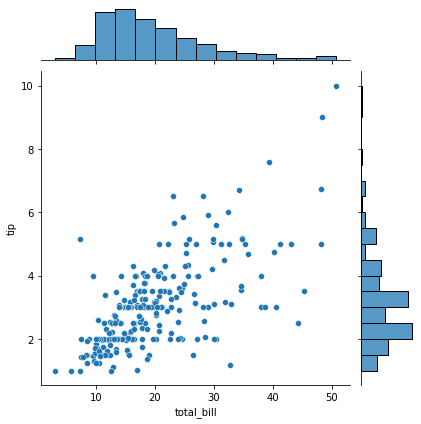

In [46]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip')



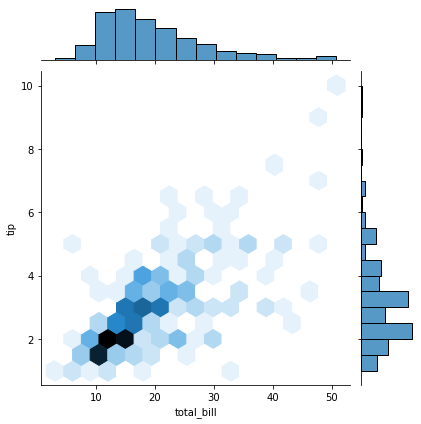

In [47]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex')

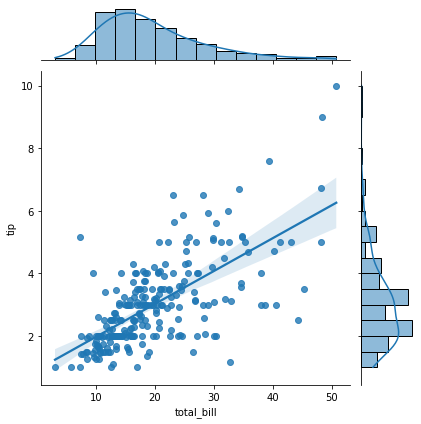

In [48]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

#### pairplot

`sns.pairplot()` will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

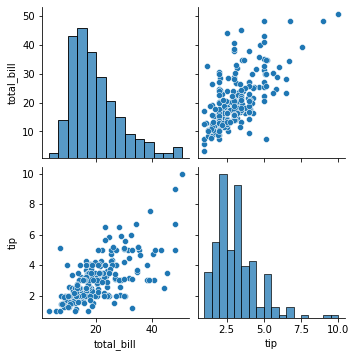

In [49]:
sns.pairplot(data = tips[['total_bill', 'tip']])



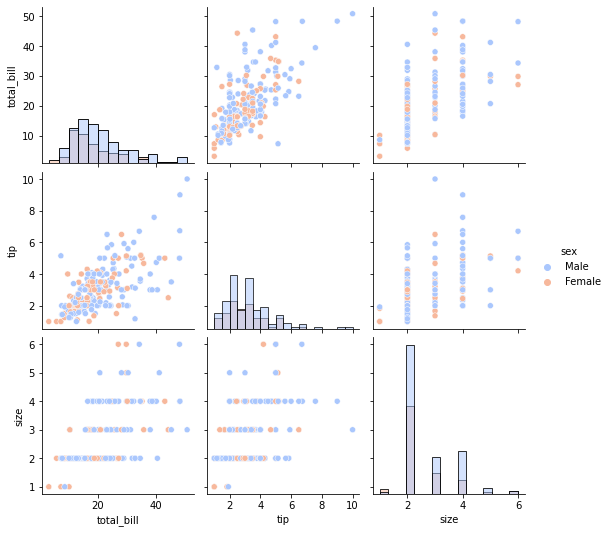

In [50]:
sns.pairplot(data = tips, hue = 'sex', diag_kind ='hist',palette='coolwarm')


___

## Section 2. Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* barplot
* countplot
* boxplot
* violinplot
* catplot


Let's go through examples of each!

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1) barplot and countplot

#### barplot
These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off of some functions, by default, the mean function.

This is similar to:

```tips.groupby('sex').mean()['total_bill']```

In [52]:
import numpy as np
import pandas as pd

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

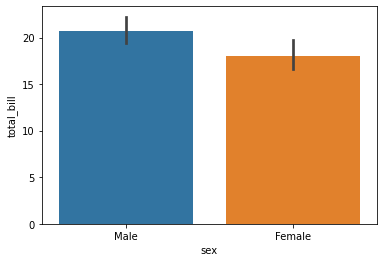

In [53]:
sns.barplot(data = tips, x = 'sex', y = 'total_bill')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

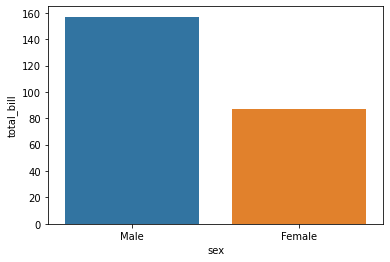

In [54]:
sns.barplot(data = tips, x = 'sex', y = 'total_bill', estimator = len)

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

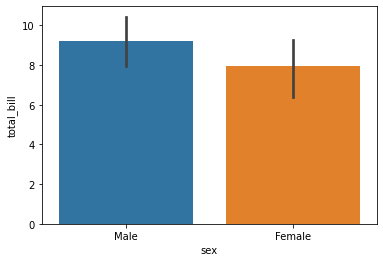

In [55]:
sns.barplot(data = tips, x = 'sex', y = 'total_bill', estimator = np.std)

#### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value.

Remember Pandas value_counts()? This is the visualization to value_counts()

<AxesSubplot:xlabel='sex', ylabel='count'>

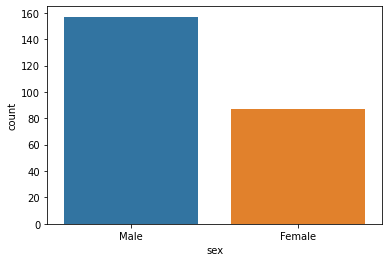

In [56]:
sns.countplot(data = tips, x = 'sex')



### 2) boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

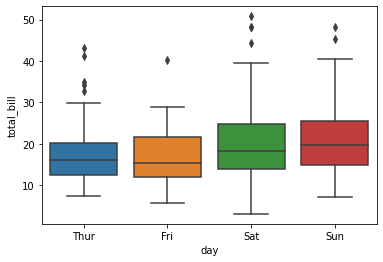

In [75]:
sns.boxplot(data = tips, x = 'day', y = 'total_bill')

<AxesSubplot:>

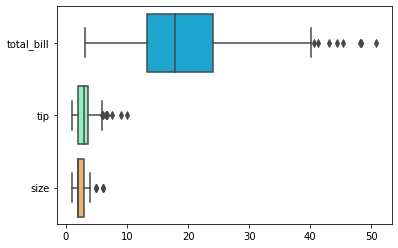

In [58]:
# Can do entire dataframe with orient='h'
sns.boxplot(data = tips, orient = 'h', palette = 'rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

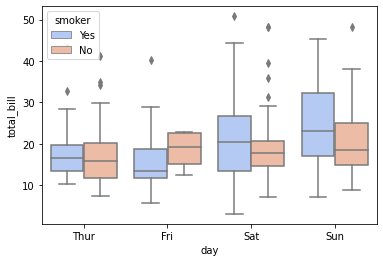

In [59]:
sns.boxplot(data = tips, x = 'day', y = 'total_bill', hue = 'smoker', palette = 'coolwarm')

#### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

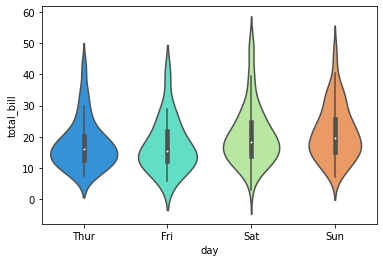

In [60]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill', palette = 'rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

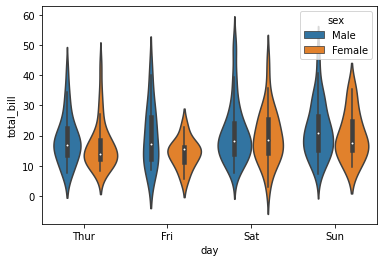

In [61]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

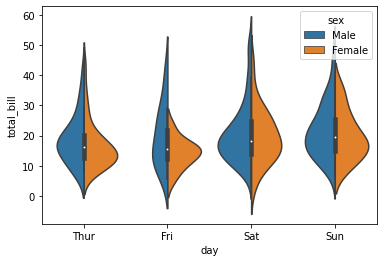

In [62]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', split = True)



### 3) catplot

catplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

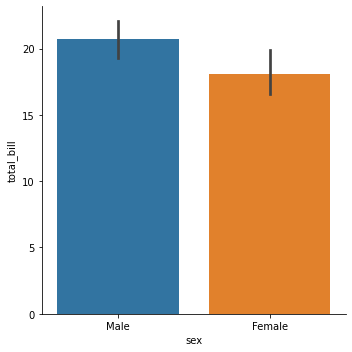

In [63]:
sns.catplot(data = tips, x = 'sex', y = 'total_bill', kind = 'bar')



___


## Section 3. Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [64]:
flights = sns.load_dataset('flights')

In [65]:
tips = sns.load_dataset('tips')

In [66]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 1) Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

Finding missing values from the dataset.

<AxesSubplot:>

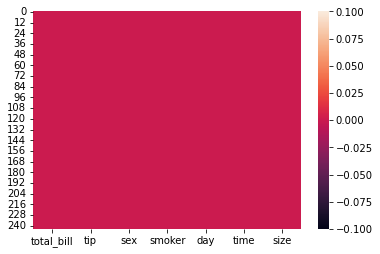

In [68]:
sns.heatmap(data = tips.isnull())

In [69]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

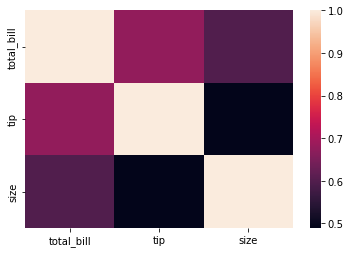

In [70]:
sns.heatmap(data = tips.corr())



<AxesSubplot:>

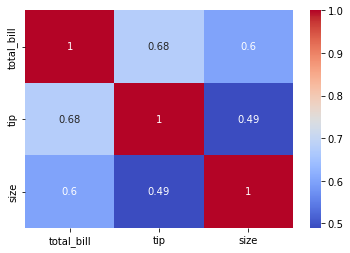

In [71]:
sns.heatmap(data = tips.corr(), annot = True, cmap = 'coolwarm')



Or for the flights data:

In [72]:
pvflights = pd.pivot_table(data = flights, 
                           values = 'passengers', 
                           index = 'month', 
                           columns = 'year')

pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

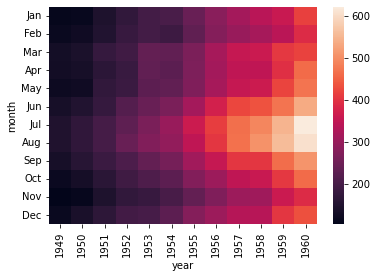

In [73]:
sns.heatmap(data = pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

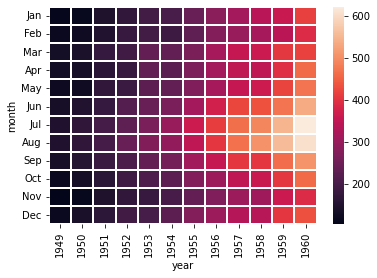

In [74]:
sns.heatmap(data = pvflights, linewidth = 2)



### 2) clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

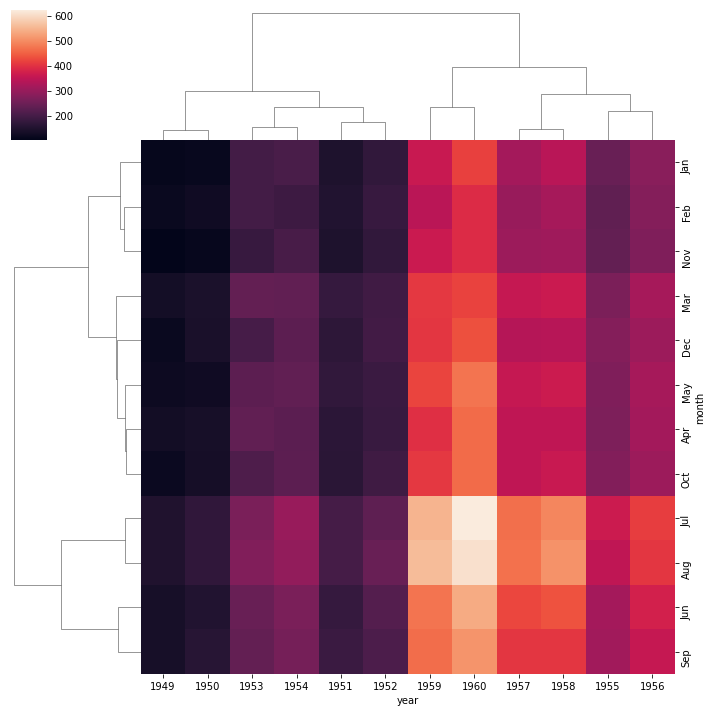

In [76]:
sns.clustermap(data = pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

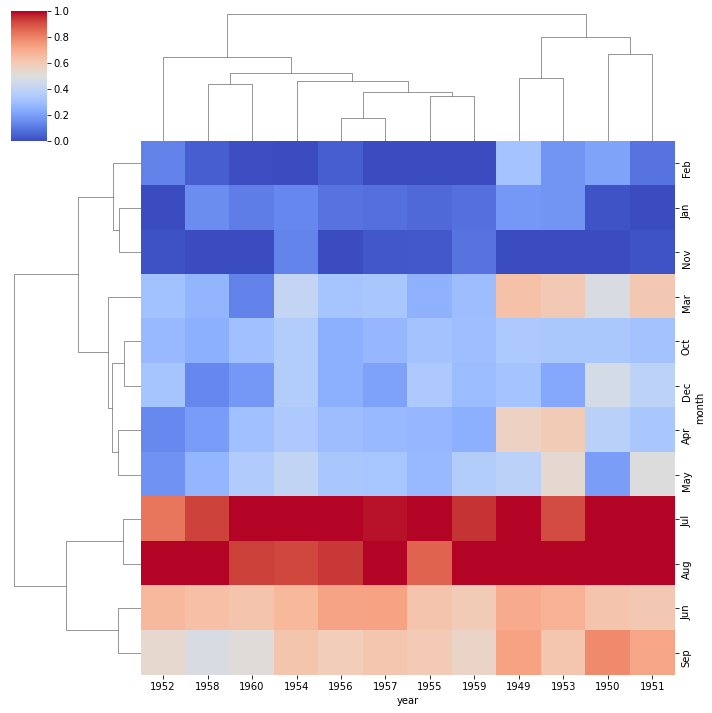

In [37]:
# More options to get the information a little clearer like normalization
sns.clustermap()

___


## Section 4. Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [77]:
iris = sns.load_dataset('iris')

In [78]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1) PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

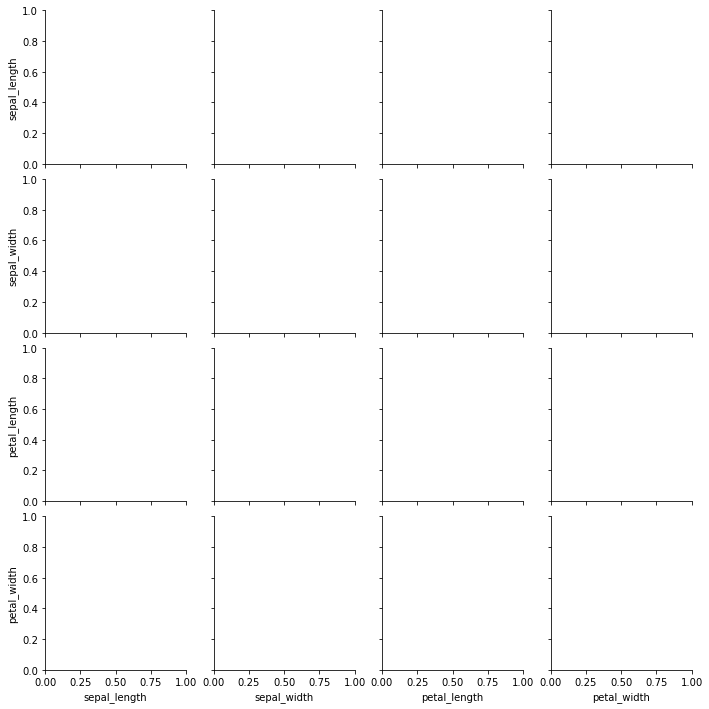

In [79]:
# First off, just create the grid
g = sns.PairGrid(data = iris)
g

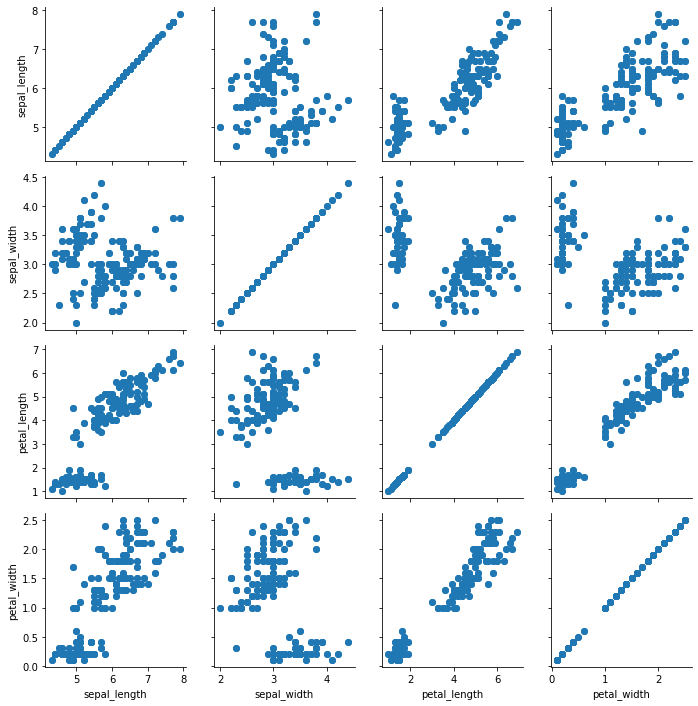

In [88]:
# Then you map to the grid
g.map(plt.scatter)

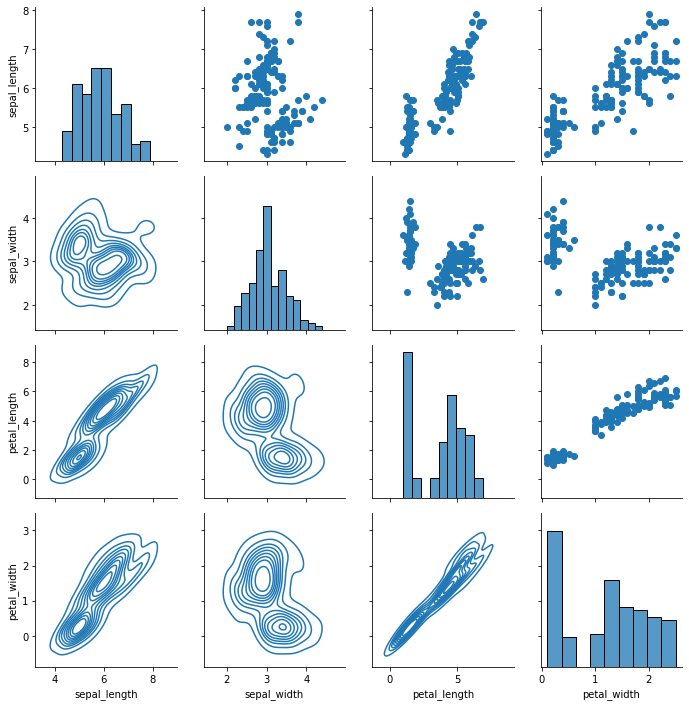

In [80]:
# Map to upper,lower, and diagonal
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### 2) Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [81]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


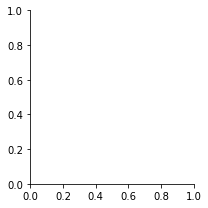

In [89]:
# Just the Grid
g = sns.FacetGrid(data = tips)



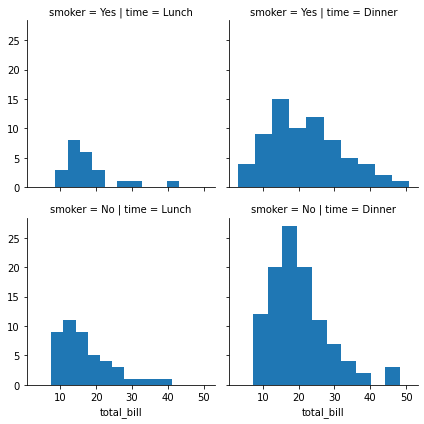

In [93]:
# Map histograms to the grid

g = sns.FacetGrid(data = tips, row = 'smoker', col = 'time')
g.map(plt.hist, 'total_bill')


Add legend to the grid.

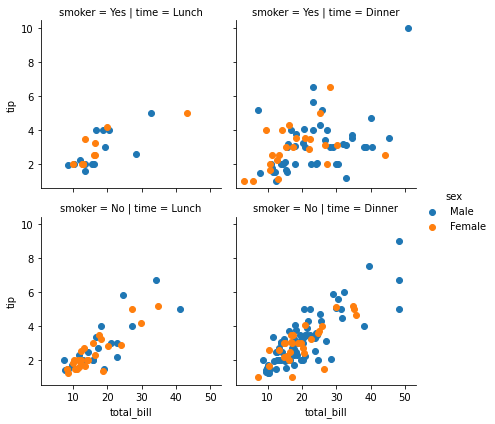

In [91]:
g = g = sns.FacetGrid(data = tips, row = 'smoker', col = 'time', hue = 'sex')
g.map(plt.scatter, 'total_bill', 'tip').add_legend()

# Great Job!